# Number Plate Recognition

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#### BGR --> RGB
OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front.

The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB, much like you do when creating the greyscale ima

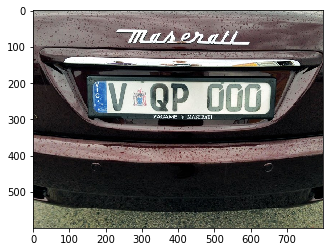

In [2]:
img = cv.imread('images/car1.jpg')
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [3]:
RGB_img.flags['C_CONTIGUOUS'], img.flags['C_CONTIGUOUS']

(True, True)

In [4]:
gray = cv.cvtColor(RGB_img, cv.COLOR_RGB2GRAY)

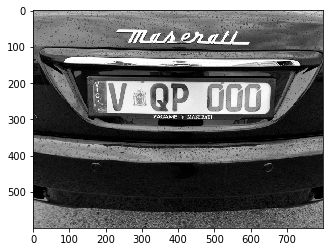

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
#cv2.imshow("grayscale",gray)
#cv2.waitKey(1)
#cv2.destroyAllWindows()

In [52]:
blurred = cv.GaussianBlur(gray, (9, 9), 9)

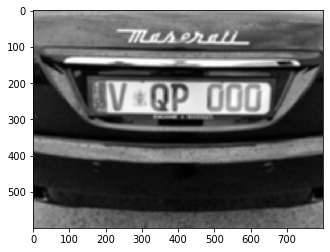

In [53]:
plt.imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB))

In [21]:
_, threshold = cv.threshold(blurred, 192, 255, cv.THRESH_BINARY)
_, threshold_otsu = cv.threshold(blurred, 192, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

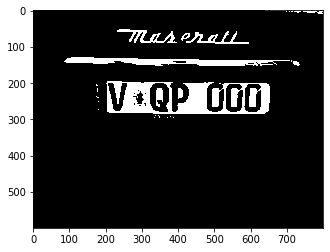

In [25]:
plt.imshow(cv.cvtColor(threshold, cv.COLOR_BGR2RGB))

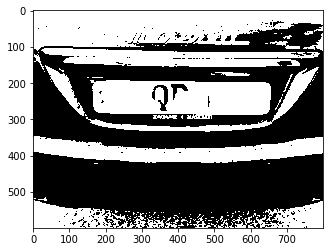

In [24]:
plt.imshow(cv.cvtColor(threshold_otsu, cv.COLOR_BGR2RGB))

In [11]:
contours, _ = cv.findContours(threshold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

In [12]:
cv.drawContours(img, contours, -1, (0, 255, 0), 3)

array([[[167, 178, 170],
        [161, 172, 164],
        [158, 169, 161],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[161, 172, 164],
        [167, 178, 170],
        [169, 180, 172],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[175, 183, 176],
        [165, 173, 166],
        [156, 163, 158],
        ...,
        [ 98, 112, 108],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[107, 139, 138],
        [120, 152, 151],
        [118, 149, 148],
        ...,
        [121, 159, 161],
        [118, 151, 154],
        [107, 140, 143]],

       [[102, 133, 130],
        [115, 146, 143],
        [121, 150, 147],
        ...,
        [126, 164, 166],
        [136, 169, 172],
        [141, 174, 177]],

       [[104, 135, 132],
        [132, 163, 160],
        [136, 165, 162],
        ...,
        [131, 169, 171],
        [134, 167, 170],
        [125, 158, 161]]

In [13]:
len(contours)

29

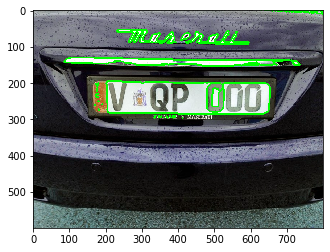

In [14]:
plt.imshow(img, cmap='gray')

for cnt in contours:
    approx = cv.approxPolyDP(cnt, 0.1*cv.arcLength(cnt, True), True)
    cv.drawContours(img, contours, -1, (0, 255, 0), 3)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    
    if len(approx) == 4:
        cv.putText(img, "Number Plate", (x, y), cv.FONT_HERSHEY_COMPLEX, 1, (0))

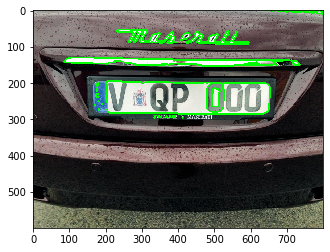

In [15]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))